In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('F:\\Jupyter Notebooks\\GradientDescent\\homeprices_banglore.csv')

In [3]:
data.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing

In [5]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [6]:
scaled_X = sx.fit_transform(data.drop('price',axis='columns'))
scaled_y = sy.fit_transform(data['price'].values.reshape(data.shape[0],1))

scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

## Batch Gradient Descent

In [8]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    features = X.shape[1] # NO. of Columns
    w = np.ones(shape=(features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b # y = w1 * x1 + w2 * x2 + bias

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list




In [9]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)

In [10]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0.5, 0, 'Epochs')

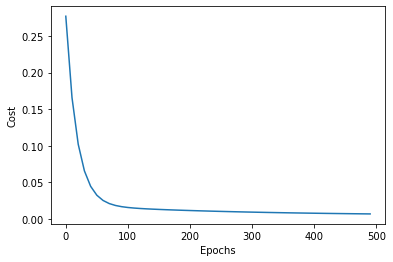

In [11]:
plt.plot(epoch_list,cost_list)
plt.ylabel('Cost')
plt.xlabel('Epochs')

## Stochastic Gradient Descent

In [12]:

import random

def Stochastic_Gradient_Descent(x, y, epochs, lr = 0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) #random Sample
        sample_x = x[random_index]
        sample_y = y[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b # Linear Regression Equation
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - lr * w_grad
        b = b - lr * b_grad
        
        cost = np.square(sample_y-y_predicted) 
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list
        

In [13]:
w, bias, cost, cost_list, epoch_list = Stochastic_Gradient_Descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)

In [14]:
w, bias, cost

(array([0.70745307, 0.67331535]), -0.23091818768761924, 0.0020458649405768075)

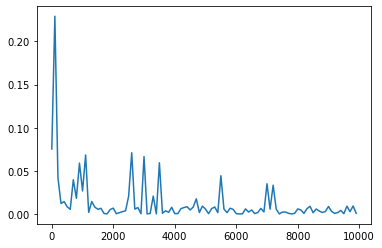

In [15]:
plt.plot(epoch_list,cost_list)
plt.xlabel()